# CardioGood Fitness Project

### 1. Business Understanding 

The objective of this project is to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. Data on individuals who purchased a treadmill at a CardioGood Fitness retail store during the prior three months has been collected. The data are stored in the CardioGoodFitness.csv file.

The data is for customers of the treadmill product(s) of a retail store called CardioGood Fitness. It contains the following variable: 
  - product purchased, TM195, TM498, or TM798; 
  - gender; 
  - age, in years; 
  - education, in years; 
  - relationship status, single or partnered; 
  - annual household income ; 
  - average number of times the customer plans to use the treadmill each week; 
  - average number of miles the customer expects to walk/run each week; and
  - self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.

With the given dataset I will try to understand the following:
1. 	What is the most popular product among the three models?  
2. 	Is there a product that is preferred by male/female customers over the others?  Which one?
3. 	Which product could be recommended to customers who can be considered as fitness enthusiasts?
4. 	What product could be recommended to customers belonging to the upper-income level?

### 2. Data Understanding
In this section of the report, I will load in the data, check for cleanliness, and prepare the dataset for analysis.

### Gather

In [1]:
# Load the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#### Reading the csv and viewing few rows to have a look at the dataframe

In [2]:
# Load the CardioGood Fitness Dataset

mydata = pd.read_csv('CardioGoodFitness.csv')

### Assess

In [3]:
# Generate a view of the dataset

mydata.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


#### Getting the size of the data

In [4]:
mydata.shape #Getting size

(180, 9)

#### Getting a brief description about the dataset

In [5]:
# Generate an overview of the dataset

mydata.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


#### Finding info about the data to get an estimate about the number of null values in diffrerent columns

In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null object
Age              180 non-null int64
Gender           180 non-null object
Education        180 non-null int64
MaritalStatus    180 non-null object
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### Clean
The result indicate that all rows in the dataset are complete and that there are no missing columns nor observations in the dataset. Therefore, the dataset is ready for analysis.

### 3. Data Preparation
Since data types are in suitable types. There is no need to convert the types to another type. Since all of the columns will be used in the analysis. There is no need to drop any columns, rather a new variable MilesPerUsage will be added. It should be noted that there no duplicate values found in the data set.

In [7]:
#checking for the duplicate rows
sum(mydata.duplicated())

0

A new variable ‘Miles Per Usage’ is created by dividing expected total miles by expected usage per week to derive expected miles per usage per customer.

In [8]:
# Variable Transformation/Feature Creation

mydata['MilesPerUsage'] = mydata['Miles']/mydata['Usage']

### 4. Modeling
#### Analyse
1. What is the most popular product among the three models? 
From the output below TM195 is the most popular product

In [9]:
mydata.groupby('Product').count()

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,MilesPerUsage
Product,,,,,,,,,
TM195,80,80,80,80,80,80,80,80,80
TM498,60,60,60,60,60,60,60,60,60
TM798,40,40,40,40,40,40,40,40,40


#### 2. Is there a product that is preferred by male/female customers over the others?  Which one? 
From the result below, TM798	is preferred product by male customers.

In [10]:
pd.crosstab(mydata['Product'],mydata['Gender'] )

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


#### 3. Which product could be recommended to customers who can be considered as fitness enthusiasts?
TM798 is the preferred product of customers who tend to have a higher self-scored fitness level.

In [11]:
pd.crosstab(mydata['Product'],mydata['Fitness'] )

Fitness,1,2,3,4,5
Product,,,,,
TM195,1,14,54,9,2
TM498,1,12,39,8,0
TM798,0,0,4,7,29


#### 4. What product could be recommended to customers belonging to the upper-income level?
The result shows that TM798 could be recommended to customers belonging to upper-income level.

In [12]:
mydata.groupby('Product')['Income'].mean()

Product
TM195    46418.025
TM498    48973.650
TM798    75441.575
Name: Income, dtype: float64

In [14]:
# Explore the correlations between all the variables in the dataset.

corr = mydata.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles,MilesPerUsage
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618,0.012678
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284,0.069552
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130,0.156523
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702,0.557926
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473,0.267164
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000,0.734778
MilesPerUsage,0.012678,0.069552,0.156523,0.557926,0.267164,0.734778,1.000000


In [29]:
# Define a function with signature pearson_r(x, y)

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0, 1]
# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(mydata['Fitness'], mydata['Miles'])

# Print the result
print(r)

0.7857017433982371


### Visualize 
I will begin with univariate analyses to understand the overall profiles of customers who purchased at least one treadmill at CardioGood Fitness in the prior 3 months

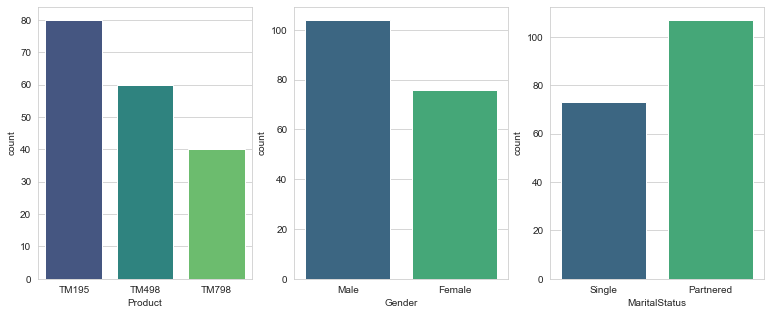

In [16]:
# Conduct univariate analysis on the variables

fig, ax =plt.subplots(1,3,figsize=(13, 5))
sns.countplot(mydata['Product'], ax=ax[0],palette='viridis')
sns.countplot(mydata['Gender'], ax=ax[1],palette='viridis')
sns.countplot(mydata['MaritalStatus'], ax=ax[2],palette='viridis')

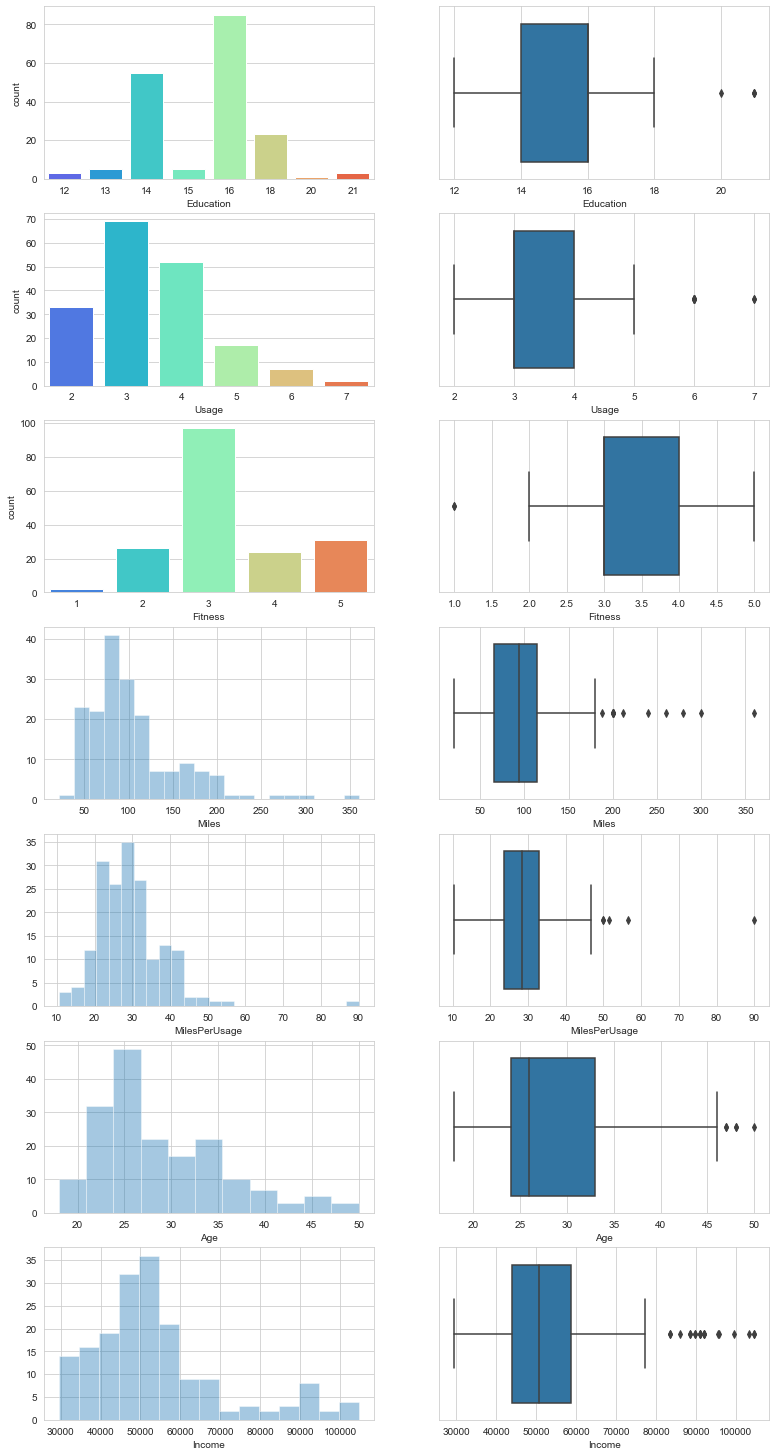

In [17]:
# Below combines histograms and box plots of each of the remaining 6 numeric variables.

fig, ax =plt.subplots(7,2,figsize=(13, 26))
plt.subplot(7,2,1,)
sns.countplot(x='Education',data=mydata,palette='rainbow')
plt.subplot(7,2,2)
sns.boxplot(x=mydata['Education'], orient='h')
plt.subplot(7,2,3)
sns.countplot(x='Usage',data=mydata,palette='rainbow')
plt.subplot(7,2,4)
sns.boxplot(x=mydata['Usage'], orient='h')
plt.subplot(7,2,5)
sns.countplot(x='Fitness',data=mydata,palette='rainbow')
plt.subplot(7,2,6)
sns.boxplot(x=mydata['Fitness'], orient='h')
plt.subplot(7,2,7)
sns.distplot(mydata['Miles'],kde=False)
plt.subplot(7,2,8)
sns.boxplot(x=mydata['Miles'], orient='h')
plt.subplot(7,2,9)
sns.distplot(mydata['MilesPerUsage'],kde=False)
plt.subplot(7,2,10)
sns.boxplot(x=mydata['MilesPerUsage'], orient='h')
plt.subplot(7,2,11)
sns.distplot(mydata['Age'],kde=False)
plt.subplot(7,2,12)
sns.boxplot(x=mydata['Age'], orient='h')
plt.subplot(7,2,13)
sns.distplot(mydata['Income'],kde=False)
plt.subplot(7,2,14)
sns.boxplot(x=mydata['Income'], orient='h')


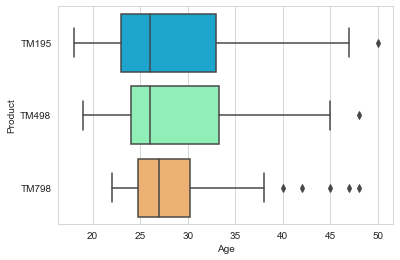

In [18]:
# Conduct bivariate analysis on the variables Product and Age

sns.boxplot(x="Age", y="Product", data=mydata,palette='rainbow',orient='h')

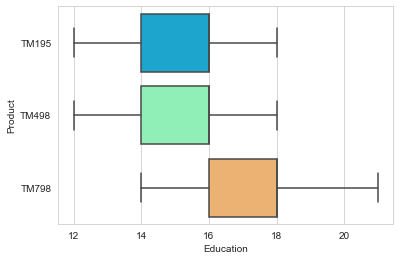

In [19]:
# Conduct bivariate analysis on the variables Product and Education

sns.boxplot(x="Education", y="Product", data=mydata,palette='rainbow',orient='h')

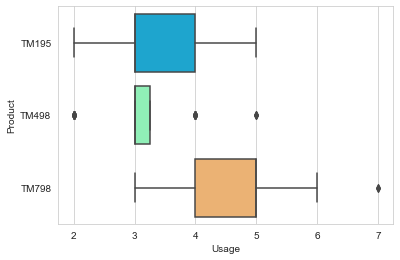

In [20]:
# Conduct bivariate analysis on the variables Product and Usage

sns.boxplot(x="Usage", y="Product", data=mydata,palette='rainbow',orient='h')

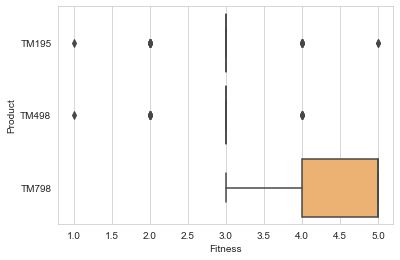

In [21]:
# Conduct bivariate analysis on the variables Product and Fitness

sns.boxplot(x="Fitness", y="Product", data=mydata,palette='rainbow',orient='h')

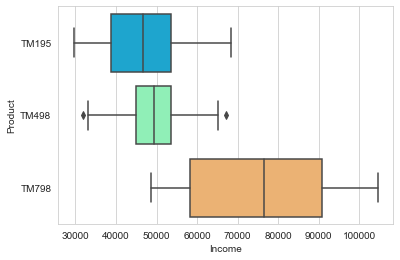

In [22]:
# Conduct bivariate analysis on the variables Product and Income
sns.boxplot(x="Income", y="Product", data=mydata,palette='rainbow',orient='h')

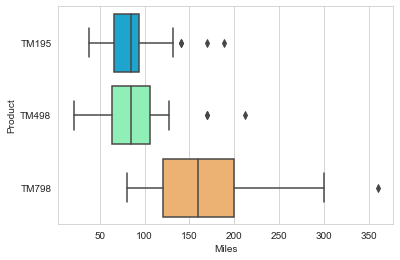

In [23]:
# Conduct bivariate analysis on the variables Product and Miles

sns.boxplot(x="Miles", y="Product", data=mydata,palette='rainbow',orient='h')

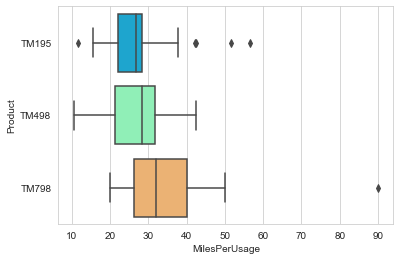

In [24]:
# Conduct bivariate analysis on the variables Product and MilesPerUsage

sns.boxplot(x="MilesPerUsage", y="Product", data=mydata,palette='rainbow',orient='h')

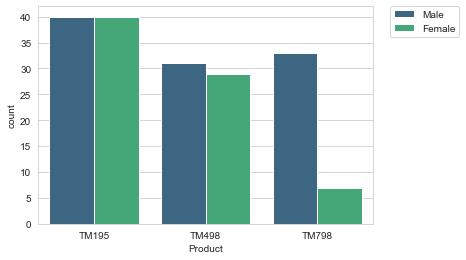

In [25]:
# Conduct bivariate analysis on the variables Product and Gender

sns.countplot(x="Product", hue="Gender", data=mydata,palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

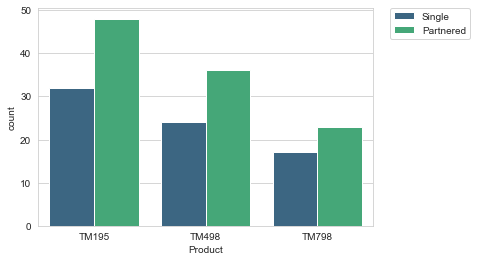

In [26]:
# Conduct bivariate analysis on the variables Product and Marital Status

sns.countplot(x="Product", hue="MaritalStatus", data=mydata,palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

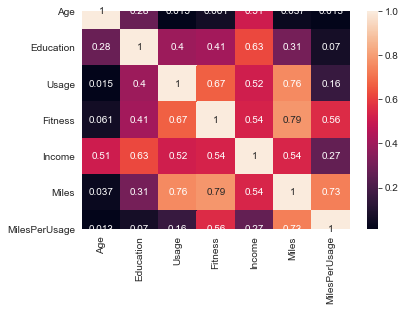

In [27]:
#  Visualize the correlations between all the variables in the dataset.
sns.heatmap(corr, annot=True)

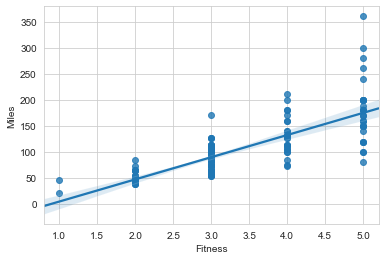

In [28]:
# Scatterplot between Fitness and Miles verifies strong positive correlation between fitness and Miles

sns.regplot(x='Fitness', y="Miles", data=mydata);

### 5. Evaluate the Results
#### Conclusion

TM195 is likely an entry-level, mainstream product catering to the masses. Its customer base represents an even split between males and females, and their ages range widely from 18 years old to 47 years old. Their median income is the lowest across the three treadmill products at $46,647, and years of education ranges between 12 and 18. They have a median fitness of 3, and there is a wide variation in the number of times they plan to use the treadmill per week, ranging from 2 times to 5 times a week. On average, they plan to run the least each time they use the treadmill. Overall, TM498 is likely a small upgrade from TM195 in terms of functionality and price.

Again, its customer base represents a relatively even split between males and females. Their age ranges between 19 and 45 years of age, and their median income is slightly higher at $49,460. Years of education range similarly between 12 and 18 and the median fitness is also 3. There is a lower variation in the number of times they intend to use the treadmill per week, ranging only between 3 to 4 times a week. On average, they plan to run slightly more each time they use the treadmill.

TM798 is likely a top-end treadmill with full, advanced functionality catered to the Fitness and running enthusiasts.
TM798 has a distinct customer profile that separates it clearly from that of TM195 and TM498. Its customer base is dominated by males, with a female: male ratio of about 1:5. The median Fitness is 5 (the highest possible rating), the median number of times they plan to use the treadmill per week is 5, and the median number of miles they intend to log is 160 miles, which is almost twice the median of TM195 and TM498 buyers. These enthusiasts also earn more than TM195 and TM498 buyers. They have a median income of $76,568.50 — almost 1.5 times that of the buyers of TM195 and TM49 — , and they receive more years of education, ranging between 14 to 21 years.

Interestingly, partnered customers are more likely to buy a treadmill across all three products. The ratio of partnered customers to single customers is approximately 1:1.4 across all products.